In [34]:
import requests
import urllib
from tqdm import tqdm
import pandas as pd
import pickle

In [35]:
data_main = pd.read_csv('Electricity_Usage_Data.csv')
v = list(data_main["service_address"].value_counts().index)

In [36]:
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote("Houston") +'?format=json'
response = requests.get(url).json()
print('Latitude: '+response[0]['lat']+', Longitude: '+response[0]['lon'])

Latitude: 29.7589382, Longitude: -95.3676974


In [ ]:
locations = {}
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote("Houston") +'?format=json'
response = requests.get(url).json()
print('Latitude: '+response[0]['lat']+', Longitude: '+response[0]['lon'])
locations['Houston'] = [response[0]['lat'],response[0]['lon']]

In [39]:
for j,i in enumerate(v):
    if i in locations.keys():
        print(j)
        print('------------------------------------------------------------------')
        continue
    p = i.replace("1/2","")
    p = p.replace("1/5","")
    p = p.replace("1/3","")
    p = p.replace("1/8","")
    p = p.replace("\n","")
    p = p+", Houston"
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(p) +'?format=json'
    try:
        response = requests.get(url).json()
        print('Latitude: '+response[0]['lat']+', Longitude: '+response[0]['lon']+i)
        print(j)
        print('------------------------------------------------------------------')
        locations[i] = [response[0]['lat'],response[0]['lon']]
    except:
        print(i,j)
        print('------------------------------------------------------------------')
        continue

VARIOUS 0
------------------------------------------------------------------
2999 S WAYSIDE 1
------------------------------------------------------------------
2
------------------------------------------------------------------
8030 BRANIFF ST B 3
------------------------------------------------------------------
4
------------------------------------------------------------------
5
------------------------------------------------------------------
6
------------------------------------------------------------------
7
------------------------------------------------------------------
MAC GREGOR PARK 8
------------------------------------------------------------------
9
------------------------------------------------------------------
10
------------------------------------------------------------------
11
------------------------------------------------------------------
12
------------------------------------------------------------------
13
----------------------------------------

In [40]:
len(v),len(locations.keys())

(6037, 3442)

In [41]:
pickle.dump(locations,open("locations.pkl","wb"))

In [10]:
locations

{'Houston': ['29.7589382', '-95.3676974'],
 '2511 BROAD ST.': ['29.705951204081636', '-95.30641040816327'],
 '14729 1/2 KATY FREEWAY': ['29.784165142857145', '-95.64428500000001'],
 '7615 1/2 W MONTGOMERY RD': ['29.863147285714287', '-95.42779842857142'],
 '13010 SPACE CENTER BLVD.': ['29.60451708714285', '-95.14331905631852'],
 '5820 LITTLE YORK': ['29.86336809377469', '-95.47604619041921'],
 '1617 1/8 WYCLIFFE DR': ['29.796029', '-95.574655'],
 '700 1/2 CHENEVERT': ['29.7584838', '-95.3536044'],
 '5203 1/8 PERRY ST': ['29.692792125396764', '-95.33853228655732'],
 '6400 HIGH STAR DR': ['29.710745', '-95.494952'],
 '611 GREGG': ['29.76752726530612', '-95.33577363265307'],
 '5875 SAN FELIPE ST': ['29.75008146512393', '-95.48498975033475'],
 '9595 FONDREN': ['29.674764749999998', '-95.50871486363636'],
 '1400 1/2 TEXAS': ['29.7589382', '-95.3676974'],
 '1718 ALLEN PARKWAY': ['29.761409180454333', '-95.38244031275535'],
 '1126 1/2 DALLAS ST': ['29.754693836734692', '-95.36500565306123'],


In [18]:
import random

In [25]:
random.randint(0,4)

0

In [26]:
data = []
for k in locations.keys():
    data.append([k,float(locations[k][0]),float(locations[k][1]),random.randint(0,4)])
df = pd.DataFrame(data,columns=["Address","lat","lon","Cluster"])
df.head()

,Address,lat,lon,Cluster
0,Houston,29.758938,-95.367697,0
1,2511 BROAD ST.,29.705951,-95.306410,4
2,14729 1/2 KATY FREEWAY,29.784165,-95.644285,4
3,7615 1/2 W MONTGOMERY RD,29.863147,-95.427798,2
4,13010 SPACE CENTER BLVD.,29.604517,-95.143319,4


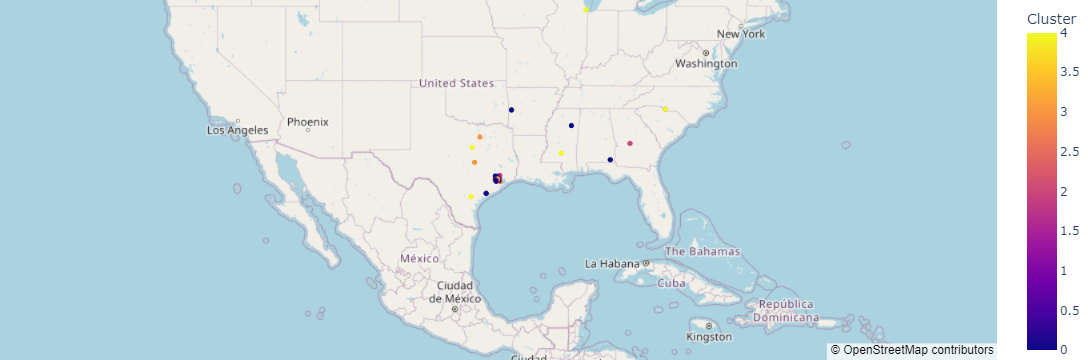

In [33]:
import pandas as pd
import plotly.express as px

fig = px.scatter_mapbox(df, lat="lat", lon="lon", hover_name="Address", hover_data=["Address","Cluster"],color="Cluster",
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300,center=dict(lat=29.7, lon=-95.3),)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()